# Hotel Analysis
## Student
- `Name` : Mohamad Ridho Farhan
- `NIM` : 2602097454
## Dataset Description
- `Booking_ID` = Pengenal unik dari tiap pemesanan
- `no_of_adults` = Jumlah orang dewasa
- `no_of_children` = Jumlah anak kecil
- `no_of_weekend_nights` = Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau memesan untuk menginap di hotel
- `no_of_week_nights` = Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau memesan untuk menginap di hotel
- `type_of_meal_plan` = Jenis paket makanan yang dipesan oleh pelanggan
- `required_car_parking_space` = Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1- Ya)
- `room_type_reserved` = Jenis kamar yang dipesan oleh pelanggan. Nilai-nilai tersebut dienkripsi oleh INN Hotels
- `lead_time` = Jumlah hari antara tanggal pemesanan dan tanggal kedatangan
- `arrival_year` = Tahun tanggal kedatangan
- `arrival_month` = Bulan tanggal kedatangan
- `arrival_date` = Tanggal kedatangan
- `market_segment_type` = Penunjukan segmen pasar
- `repeated_guest` = Apakah pelanggan tersebut merupakan tamu yang pernah melakukan booking dan juga menginap? (0 - Tidak, 1- Ya)
- `no_of_previous_cancellations` = Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini
- `no_of_previous_bookings_not_canceled` = Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini
- `avg_price_per_room` = Harga rata-rata per hari pemesanan; harga kamar bersifat dinamis. (dalam euro)
- `no_of_special_requests` = Jumlah total permintaan khusus yang dibuat oleh pelanggan (misalnya lantai yang tinggi, pemandangan dari kamar, dan lain-lain.)
- `booking_status` (target variable) = Flag yang menunjukkan apakah pemesanan dibatalkan atau tidak. 



# 1. Eksplorasi dan Pre-processing Data Pemesanan Hotel

### 1.1. Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # Untuk menyimpan objek preprocessor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [3]:
try:
    df = pd.read_csv('Dataset_B_hotel.csv')
    print("Dataset berhasil dimuat.")
    print(f"Ukuran dataset awal: {df.shape}")
except FileNotFoundError:
    print("Error: File dataset tidak ditemukan. Pastikan path file benar.")

Dataset berhasil dimuat.
Ukuran dataset awal: (36275, 19)


### 1.2. EDA

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
# Statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif (Kolom Numerik):")
display(df.describe())


Statistik Deskriptif (Kolom Numerik):


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,35005.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,34643.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.031281,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.447208,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.174079,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.158417,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.275000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
# Statistik deskriptif untuk kolom kategorikal (object)
print("\nStatistik Deskriptif (Kolom Kategorikal):")
display(df.describe(include='object'))


Statistik Deskriptif (Kolom Kategorikal):


,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,35368,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27157,28130,23214,24390


In [8]:
# Jumlah nilai unik di setiap kolom
print("\nJumlah Nilai Unik per Kolom:")
df.nunique()


Jumlah Nilai Unik per Kolom:


Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3850
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [9]:
# distribusi variabel target ('booking_status')
print("\nDistribusi Variabel Target (booking_status):")
target_counts = df['booking_status'].value_counts()
target_perc = df['booking_status'].value_counts(normalize=True) * 100
print(target_counts)
print(f"\nPersentase:\n{target_perc}")


Distribusi Variabel Target (booking_status):
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

Persentase:
booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9324\2540506137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='booking_status', data=df, palette='viridis')


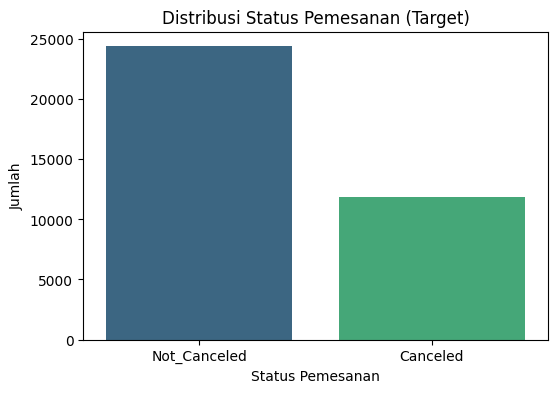

In [10]:
# Visualisasi distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='booking_status', data=df, palette='viridis')
plt.title('Distribusi Status Pemesanan (Target)')
plt.xlabel('Status Pemesanan')
plt.ylabel('Jumlah')
plt.show()

### 1.3. Data Cleaning

#### 1.3.1 Missing Value Handling

In [11]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Jumlah Missing': missing_values, 'Persentase Missing (%)': missing_percent})
print("\nInformasi Missing Values:")
display(missing_info[missing_info['Jumlah Missing'] > 0].sort_values(by='Persentase Missing (%)', ascending=False))



Informasi Missing Values:


,Jumlah Missing,Persentase Missing (%)
avg_price_per_room,1632,4.498966
required_car_parking_space,1270,3.501034
type_of_meal_plan,907,2.500345


Strategi Penanganan Missing Values:
* `avg_price_per_room`: Terdapat missing values (~4.5%). Akan diimputasi menggunakan **median** karena distribusi harga mungkin skewed dan ada nilai minimum 0.
* `required_car_parking_space`: Terdapat missing values (~3.5%). Ini adalah kolom binary (0/1). Akan diimputasi dengan **0** (asumsi jika kosong berarti tidak perlu parkir).
* `type_of_meal_plan`: Terdapat missing values (~2.5%). Ini adalah kolom kategori. Akan diimputasi dengan **modus** (nilai yang paling sering muncul, yaitu 'Meal Plan 1' berdasarkan EDA).


In [12]:
# Imputasi avg_price_per_room dengan median
median_price = df['avg_price_per_room'].median()
df['avg_price_per_room'].fillna(median_price, inplace=True)
print(f"Missing values di 'avg_price_per_room' diimputasi dengan median: {median_price}")


Missing values di 'avg_price_per_room' diimputasi dengan median: 99.45


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9324\3715620577.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_price_per_room'].fillna(median_price, inplace=True)


In [13]:
# Imputasi required_car_parking_space dengan 0
df['required_car_parking_space'].fillna(0, inplace=True)
print("Missing values di 'required_car_parking_space' diimputasi dengan 0.")


Missing values di 'required_car_parking_space' diimputasi dengan 0.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9324\3948360108.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['required_car_parking_space'].fillna(0, inplace=True)


In [14]:
# Imputasi type_of_meal_plan dengan modus
mode_meal = df['type_of_meal_plan'].mode()[0]
df['type_of_meal_plan'].fillna(mode_meal, inplace=True)
print(f"Missing values di 'type_of_meal_plan' diimputasi dengan modus: '{mode_meal}'")


Missing values di 'type_of_meal_plan' diimputasi dengan modus: 'Meal Plan 1'


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9324\2307824243.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type_of_meal_plan'].fillna(mode_meal, inplace=True)


In [15]:
print("\nMissing values setelah imputasi:")
print(f"Total missing values tersisa: {df.isnull().sum().sum()}") # Seharusnya 0


Missing values setelah imputasi:
Total missing values tersisa: 0


#### 1.3.2 Koreksi Tipe Data 

In [16]:
# Kolom 'required_car_parking_space' seharusnya integer setelah imputasi
df['required_car_parking_space'] = df['required_car_parking_space'].astype(int)
df[['required_car_parking_space']].dtypes


required_car_parking_space    int32
dtype: object

#### 1.3.3 Data Duplikat

In [17]:
num_duplicates_before = df.duplicated().sum()
print(f"\nJumlah baris duplikat sebelum dihapus: {num_duplicates_before}")


Jumlah baris duplikat sebelum dihapus: 0


### 1.4 Feature Engineering
Membuat fitur baru dari fitur yang sudah ada untuk potentially meningkatkan performa model.


In [18]:
# total malam menginap
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
# total tamu
df['total_guests'] = df['no_of_adults'] + df['no_of_children']

In [19]:
# Membersihkan data yang tidak logis (misalnya, tidak ada tamu sama sekali)
invalid_booking_count = df[df['total_guests'] == 0].shape[0]
print(f"\nJumlah pemesanan dengan 0 tamu (dewasa + anak): {invalid_booking_count}")



Jumlah pemesanan dengan 0 tamu (dewasa + anak): 0


In [20]:
print("\nDataset dengan fitur baru ('total_nights', 'total_guests'):")
print("Unique Total Nights : ",np.unique(df['total_nights']))
print("Unique Total Guest : ",np.unique(df['total_guests']))


Dataset dengan fitur baru ('total_nights', 'total_guests'):
Unique Total Nights :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Unique Total Guest :  [ 1  2  3  4  5 10 11 12]


### 1.5. Encoding Fitur Kategorikal & Target

In [21]:
# Encoding Variabel Target ('booking_status')
target_map = {'Canceled': 1, 'Not_Canceled': 0}
df['booking_status'] = df['booking_status'].map(target_map)
print("\nVariabel target setelah encoding (1: Canceled, 0: Not Canceled):")
print(df['booking_status'].value_counts())


Variabel target setelah encoding (1: Canceled, 0: Not Canceled):
booking_status
0    24390
1    11885
Name: count, dtype: int64


In [22]:
# Identifikasi kolom kategorikal (tipe 'object')
categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [23]:
# Kolom 'room_type_reserved' juga kategorikal meskipun terenkripsi
if 'room_type_reserved' not in categorical_cols and 'room_type_reserved' in df.columns:
    categorical_cols.append('room_type_reserved') # Jika tipe datanya bukan object tapi seharusnya kategorikal


In [24]:
print(f"\nKolom yang teridentifikasi sebagai kategorikal (tipe object): {categorical_cols}")



Kolom yang teridentifikasi sebagai kategorikal (tipe object): ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


**Strategi Encoding:**
Menggunakan One-Hot Encoding karena sebagian besar fitur kategorikal tidak memiliki urutan intrinsik (nominal). `drop_first=True` digunakan untuk menghindari multikolinearitas.


In [25]:
# Terapkan One-Hot Encoding
print(f"\nUkuran data sebelum OHE: {df.shape}")
if 'Booking_ID' in categorical_cols:
    categorical_cols.remove('Booking_ID')


Ukuran data sebelum OHE: (36275, 21)


In [26]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
print(f"Ukuran data setelah OHE: {df_encoded.shape}")

Ukuran data setelah OHE: (36275, 31)


In [27]:
# Update dataframe utama
df = df_encoded
display(df.head())

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,0,1,2,0,224,2017,10,2,...,0,0,0,0,0,0,0,0,1,0
1,INN00002,2,0,2,3,0,5,2018,11,6,...,0,0,0,0,0,0,0,0,0,1
2,INN00003,1,0,2,1,0,1,2018,2,28,...,0,0,0,0,0,0,0,0,0,1
3,INN00004,2,0,0,2,0,211,2018,5,20,...,0,0,0,0,0,0,0,0,0,1
4,INN00005,2,0,1,1,0,48,2018,4,11,...,0,0,0,0,0,0,0,0,0,1


### 1.6 Data Spliting (Features & Target)
Memisahkan dataset menjadi matriks fitur (X) dan vektor target (y). Kolom identifier seperti `Booking_ID` dan kolom tanggal asli (jika tidak digunakan/diubah) akan dihapus dari fitur.


In [28]:
# Kolom tanggal asli (arrival_year, month, date) kita biarkan sebagai fitur numerik untuk saat ini
# Hapus kolom identifier ('Booking_ID')
columns_to_drop_final = ['Booking_ID']

In [29]:
existing_cols_to_drop = [col for col in columns_to_drop_final if col in df.columns]
features = df.drop(columns=['booking_status'] + existing_cols_to_drop, axis=1)
target = df['booking_status']

In [30]:
print("\nDataset dipisahkan menjadi Fitur (X) dan Target (y)")
print("Bentuk Fitur (X):", features.shape)
print("Bentuk Target (y):", target.shape)
print("\nContoh beberapa nama kolom fitur:")
print(features.columns[:15].tolist()) 


Dataset dipisahkan menjadi Fitur (X) dan Target (y)
Bentuk Fitur (X): (36275, 29)
Bentuk Target (y): (36275,)

Contoh beberapa nama kolom fitur:
['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'total_nights']


### 1.7 Data Spliting (Train & Test Split)
Membagi data fitur (X) dan target (y) menjadi set pelatihan (train) dan set pengujian (test). Stratifikasi berdasarkan target (y) penting untuk menjaga proporsi kelas.


In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.2,      # 20% data untuk pengujian
    random_state=42,    # Untuk reproduktivitas
    stratify=target     # Menjaga proporsi kelas target di train dan test set
)

In [33]:
print("\nData berhasil dibagi menjadi set pelatihan dan pengujian:")
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)
print("\nProporsi target di y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporsi target di y_test:")
print(y_test.value_counts(normalize=True))


Data berhasil dibagi menjadi set pelatihan dan pengujian:
Ukuran X_train: (29020, 29)
Ukuran X_test: (7255, 29)
Ukuran y_train: (29020,)
Ukuran y_test: (7255,)

Proporsi target di y_train:
booking_status
0    0.672364
1    0.327636
Name: proportion, dtype: float64

Proporsi target di y_test:
booking_status
0    0.672364
1    0.327636
Name: proportion, dtype: float64


### 1.8 Feature Scaling
Menskalakan fitur numerik menggunakan StandardScaler (mean=0, std=1). Scaling dilakukan *setelah* pemisahan data. Fitur hasil One-Hot Encoding (0/1) dan fitur biner asli tidak di-scaling.


In [34]:
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pickle      
import os          

In [35]:
# Identifikasi kolom numerik di X_train
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()


In [36]:
# Kolom biner (nilai unik <= 2) tidak perlu di-scaling
# Ini termasuk kolom OHE (drop_first=True), required_car_parking_space, repeated_guest
binary_cols = [col for col in numerical_cols if X_train[col].nunique() <= 2]


In [37]:
# Kolom yang akan di-scale adalah kolom numerik non-biner
cols_to_scale = [col for col in numerical_cols if col not in binary_cols]

In [38]:
print(f"\nKolom numerik yang akan di-scaling ({len(cols_to_scale)} kolom):")
print(cols_to_scale) 


Kolom numerik yang akan di-scaling (13 kolom):
['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'total_nights', 'total_guests']


In [ ]:
if not cols_to_scale:
    print("Tidak ada kolom numerik non-biner yang perlu di-scaling.")
else:
  # Inisialisasi dan terapkan scaler
    scaler = StandardScaler()

    # Fit scaler HANYA pada data training
    X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

    # Transform data test menggunakan scaler yang sudah di-fit
    X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

    print("\nFitur numerik telah di-scaling.")
    print("Contoh data X_train setelah scaling (kolom yang di-scale):")
    display(X_train[cols_to_scale].head())

    # Simpan scaler yang sudah di-fit untuk digunakan nanti saat inference
    model_folder = '../models'
    if not os.path.exists(model_folder):
        os.makedirs(model_folder)
        print(f"Folder '{model_folder}' telah dibuat.")

    try:
        scaler_path = os.path.join(model_folder, 'scaler.pkl')
        with open(scaler_path, 'wb') as f:
            pickle.dump(scaler, f)
        print(f"\nScaler berhasil disimpan ke '{scaler_path}'")
    except Exception as e:
        print(f"\nError saat menyimpan scaler: {e}")



Fitur numerik telah di-scaling.


Contoh data X_train setelah scaling (kolom yang di-scale):


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_nights,total_guests
11731,0.298918,-0.26463,1.362393,-0.141380,-0.921571,1.492556,-1.326962,-0.063684,-0.089459,-1.025467,-0.789293,0.553799,0.076365
35609,0.298918,-0.26463,0.214274,1.278289,0.728984,1.492556,1.646557,-0.063684,-0.089459,-0.112121,-0.789293,1.114632,0.076365
21639,0.298918,-0.26463,1.362393,1.988124,1.275294,-0.137542,0.617262,-0.063684,-0.089459,-0.358971,0.483859,2.236299,0.076365
24432,-1.626204,-0.26463,-0.933846,0.568455,0.089685,0.840517,-1.098230,-0.063684,-0.089459,0.293004,3.030164,-0.007035,-1.464751
31975,0.298918,-0.26463,0.214274,-0.141380,2.553892,1.166536,-1.326962,-0.063684,-0.089459,-0.415602,-0.789293,-0.007035,0.076365



Scaler berhasil disimpan ke '../models\scaler.pkl'


# 2. Pelatihan dan Evaluasi
Pada tahap ini, kita akan melatih dua model machine learning yang berbeda (*Random Forest dan XGBoost*) menggunakan data training yang sudah diproses. Kemudian, kita akan mengevaluasi performa kedua model pada data testing untuk membandingkan dan memilih model terbaik. Model terbaik akan disimpan untuk digunakan nanti dalam proses inference/deployment.


In [40]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time

## 2.1 Inisialisasi Model
Membuat instance dari model `RandomForestClassifier` dan `XGBClassifier`. Kita akan menggunakan `random_state=42` untuk memastikan hasil yang dapat direproduksi. Parameter lain dapat disesuaikan (hyperparameter tuning) untuk optimasi lebih lanjut, namun kita mulai dengan pengaturan dasar yang wajar.


In [41]:
# Inisialisasi Random Forest Classifier
# n_estimators: Jumlah pohon dalam forest
# max_depth: Kedalaman maksimum pohon (membantu mencegah overfitting)
# n_jobs=-1: Menggunakan semua prosesor yang tersedia
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)


In [42]:
# Inisialisasi XGBoost Classifier
# use_label_encoder=False: Untuk menghindari warning di versi XGBoost baru
# eval_metric='logloss': Metrik evaluasi yang umum digunakan untuk klasifikasi biner
# early_stopping_rounds (opsional): Dapat ditambahkan saat fit untuk mencegah overfitting jika menggunakan validation set
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')


## 2.2 Training Model

### 2.2.1 Basemodel

#### 2.2.1.1 Random Forest

In [43]:
start_time_rf = time.time()
rf_model.fit(X_train, y_train)
end_time_rf = time.time()
print(f"Pelatihan Random Forest selesai dalam {end_time_rf - start_time_rf:.2f} detik.")


Pelatihan Random Forest selesai dalam 0.29 detik.


#### 2.2.1.2 Evaluasi Random Forest
mengevaluasi performa model menggunakan berbagai metrik klasifikasi. Visualisasi Confusion Matrix juga disertakan.


In [44]:
# Prediksi kelas
y_pred_rf = rf_model.predict(X_test)

In [45]:
# Prediksi probabilitas untuk kelas positif (kelas 1 - Canceled)
# Diperlukan untuk ROC AUC
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [46]:
# Hitung dan tampilkan metrik evaluasi
print("\nLaporan Klasifikasi (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=['Not Canceled (0)', 'Canceled (1)']))
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"Akurasi: {accuracy_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")



Laporan Klasifikasi (Random Forest):
                  precision    recall  f1-score   support

Not Canceled (0)       0.88      0.94      0.91      4878
    Canceled (1)       0.86      0.74      0.80      2377

        accuracy                           0.88      7255
       macro avg       0.87      0.84      0.85      7255
    weighted avg       0.88      0.88      0.87      7255

Akurasi: 0.8759
ROC AUC Score: 0.9346


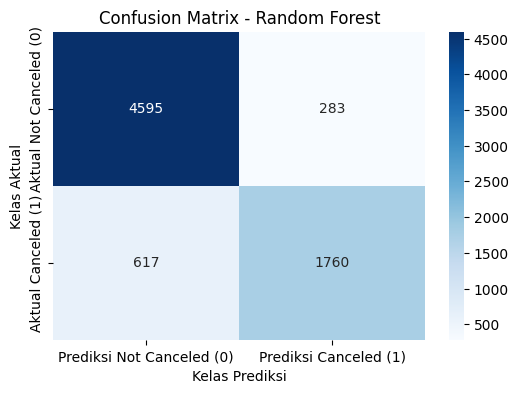

In [47]:
# Hitung Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prediksi Not Canceled (0)', 'Prediksi Canceled (1)'],
            yticklabels=['Aktual Not Canceled (0)', 'Aktual Canceled (1)'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Kelas Aktual')
plt.xlabel('Kelas Prediksi')
plt.show()

#### 2.2.1.3 XGBoost

In [48]:
start_time_xgb = time.time()
xgb_model.fit(X_train, y_train)
end_time_xgb = time.time()
print(f"Pelatihan XGBoost selesai dalam {end_time_xgb - start_time_xgb:.2f} detik.")

Pelatihan XGBoost selesai dalam 0.19 detik.


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:06:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


#### 2.2.1.4 Evaluasi XGBoost

In [49]:
# Prediksi kelas
y_pred_xgb = xgb_model.predict(X_test)


In [50]:
# Prediksi probabilitas untuk kelas positif (kelas 1 - Canceled)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [51]:
# Hitung dan tampilkan metrik evaluasi
print("\nLaporan Klasifikasi (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=['Not Canceled (0)', 'Canceled (1)']))

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"Akurasi: {accuracy_xgb:.4f}")
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")



Laporan Klasifikasi (XGBoost):
                  precision    recall  f1-score   support

Not Canceled (0)       0.91      0.94      0.92      4878
    Canceled (1)       0.86      0.80      0.83      2377

        accuracy                           0.89      7255
       macro avg       0.89      0.87      0.88      7255
    weighted avg       0.89      0.89      0.89      7255

Akurasi: 0.8937
ROC AUC Score: 0.9552


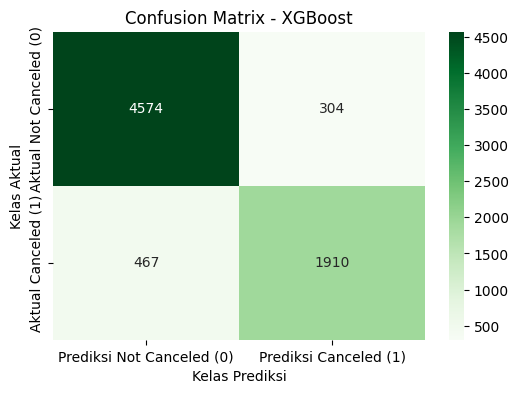

In [52]:
# Hitung Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Prediksi Not Canceled (0)', 'Prediksi Canceled (1)'],
            yticklabels=['Aktual Not Canceled (0)', 'Aktual Canceled (1)'])
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('Kelas Aktual')
plt.xlabel('Kelas Prediksi')
plt.show()

### 2.2.2 Hyperparameter Tuning

#### 2.2.2.1 Inisialisasi

In [53]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
import numpy as np # Untuk distribusi parameter jika diperlukan
import os # Untuk menyimpan model

In [ ]:
# Grid Parameter untuk Random Forest
rf_param_dist = {
    'n_estimators': [100, 200, 300], # Jumlah pohon
    'max_depth': [10, 20, 30, None], # Kedalaman maksimum, None berarti tanpa batas
    'min_samples_split': [2, 5, 10], # Jumlah minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4], # Jumlah minimum sampel di daun
    'criterion': ['gini', 'entropy'], # Kriteria pemisahan
    'bootstrap': [True, False] 
}

In [ ]:
# Grid Parameter untuk XGB

xgb_param_dist = {
    'n_estimators': [100, 200, 300], # Jumlah ronde boosting
    'max_depth': [3, 5, 7, 9], # Kedalaman maksimum pohon
    'learning_rate': [0.01, 0.1, 0.2], # Laju pembelajaran
    'subsample': [0.7, 0.8, 0.9, 1.0], # Fraksi sampel per pohon
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0], # Fraksi fitur per pohon
    'gamma': [0, 0.1, 0.2], # Minimum loss reduction untuk split
    'reg_alpha': [0, 0.01, 0.1], # L1 regularization 
    'reg_lambda': [1, 1.5, 2] # L2 regularization
}

#### 2.2.2.2 Eksekusi Hyperparameter Tuning

In [58]:
# Pengaturan Cross-Validation
cv_folds = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Jumlah iterasi random search
n_iter_search = 50 


##### a. Random Forest

In [60]:
print(f"Memulai Tuning Random Forest ({n_iter_search} iterasi, {cv_folds.get_n_splits()}-fold CV)...")
start_time_rf_tune = time.time()

rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_tuner = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=rf_param_dist,
    n_iter=n_iter_search,
    cv=cv_folds,
    scoring='roc_auc', # Optimalkan berdasarkan ROC AUC
    n_jobs=-1,
    random_state=42,
    verbose=1 
)
rf_tuner.fit(X_train, y_train) 
# Ambil hasil CV dan ubah ke DataFrame
rf_cv_results_df = pd.DataFrame(rf_tuner.cv_results_)
# Pilih kolom yang relevan untuk ditampilkan
rf_results_display = rf_cv_results_df[[
    'rank_test_score',
    'mean_test_score',
    'std_test_score',
    'params',
    'mean_fit_time'
]].sort_values(by='rank_test_score') # Urutkan berdasarkan rank terbaik
end_time_rf_tune = time.time()


Memulai Tuning Random Forest (50 iterasi, 5-fold CV)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [61]:
print("\nDetail Hasil Tuning Random Forest (Semua Kombinasi):")
pd.set_option('display.max_colwidth', None)
display(rf_results_display)
pd.reset_option('display.max_colwidth') 


Detail Hasil Tuning Random Forest (Semua Kombinasi):


,rank_test_score,mean_test_score,std_test_score,params,mean_fit_time
4,1,0.952445,0.001710,"{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}",11.567330
27,2,0.952201,0.001656,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}",8.680226
16,3,0.952115,0.002632,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}",9.331074
40,4,0.952022,0.001732,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': False}",9.233813
6,5,0.951856,0.001814,"{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}",7.151793
19,6,0.951379,0.001726,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'gini', 'bootstrap': False}",6.825027
5,7,0.951345,0.002274,"{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini', 'bootstrap': False}",11.030432
48,8,0.951282,0.001726,"{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False}",5.621374
32,9,0.950936,0.001967,"{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}",7.183956
28,10,0.950738,0.001615,"{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False}",7.496747


In [62]:
print(f"Tuning Random Forest selesai dalam {end_time_rf_tune - start_time_rf_tune:.2f} detik.")
print("Parameter terbaik untuk Random Forest:", rf_tuner.best_params_)
print(f"Skor ROC AUC CV terbaik: {rf_tuner.best_score_:.4f}")

Tuning Random Forest selesai dalam 131.44 detik.
Parameter terbaik untuk Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}
Skor ROC AUC CV terbaik: 0.9524


In [63]:
# Ambil model RF terbaik hasil tuning
rf_tuned_model = rf_tuner.best_estimator_

##### b. XGBoost

In [64]:
print(f"\nMemulai Tuning XGBoost ({n_iter_search} iterasi, {cv_folds.get_n_splits()}-fold CV)...")
start_time_xgb_tune = time.time()

xgb_base = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Base model
xgb_tuner = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=xgb_param_dist,
    n_iter=n_iter_search,
    cv=cv_folds,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
xgb_tuner.fit(X_train, y_train) # Tuning pada data training
# Ambil hasil CV dan ubah ke DataFrame
xgb_cv_results_df = pd.DataFrame(xgb_tuner.cv_results_)
xgb_results_display = xgb_cv_results_df[[
    'rank_test_score',
    'mean_test_score',
    'std_test_score',
    'params',
    'mean_fit_time'
]].sort_values(by='rank_test_score') 
end_time_xgb_tune = time.time()



Memulai Tuning XGBoost (50 iterasi, 5-fold CV)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:12:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [65]:
print("\nDetail Hasil Tuning XGBoost (Semua Kombinasi):")
pd.set_option('display.max_colwidth', None)
display(xgb_results_display)
pd.reset_option('display.max_colwidth') # Reset opsi ke default


Detail Hasil Tuning XGBoost (Semua Kombinasi):


,rank_test_score,mean_test_score,std_test_score,params,mean_fit_time
29,1,0.953089,0.001229,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}",1.961023
49,2,0.953042,0.001297,"{'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}",2.262988
21,3,0.952898,0.001987,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}",2.132784
25,4,0.952709,0.001262,"{'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}",1.739215
48,5,0.952680,0.001058,"{'subsample': 0.9, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.8}",2.040160
1,6,0.952620,0.001354,"{'subsample': 0.7, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}",3.611447
33,7,0.951818,0.001485,"{'subsample': 0.7, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.9}",2.235017
36,8,0.951540,0.001176,"{'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}",2.813395
38,9,0.951375,0.001287,"{'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}",1.628578
46,10,0.951219,0.001204,"{'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}",1.105980


In [66]:
print(f"Tuning XGBoost selesai dalam {end_time_xgb_tune - start_time_xgb_tune:.2f} detik.")
print("Parameter terbaik untuk XGBoost:", xgb_tuner.best_params_)
print(f"Skor ROC AUC CV terbaik (XGB): {xgb_tuner.best_score_:.4f}")

Tuning XGBoost selesai dalam 27.67 detik.
Parameter terbaik untuk XGBoost: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}
Skor ROC AUC CV terbaik (XGB): 0.9531


In [67]:
# Ambil model XGB terbaik hasil tuning
xgb_tuned_model = xgb_tuner.best_estimator_

#### 2.2.2.3 Evaluasi Hyperparameter Tuning

##### a. Random Forest

In [68]:
print("\nMengevaluasi Model Random Forest (Hasil Tuning) pada data test...")
y_pred_rf_tuned = rf_tuned_model.predict(X_test)
y_prob_rf_tuned = rf_tuned_model.predict_proba(X_test)[:, 1]


Mengevaluasi Model Random Forest (Hasil Tuning) pada data test...


In [69]:
print("\nLaporan Klasifikasi (Random Forest - Tuned):")
print(classification_report(y_test, y_pred_rf_tuned, target_names=['Not Canceled (0)', 'Canceled (1)']))
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
roc_auc_rf_tuned = roc_auc_score(y_test, y_prob_rf_tuned)
print(f"Akurasi (RF Tuned): {accuracy_rf_tuned:.4f}")
print(f"ROC AUC Score (RF Tuned): {roc_auc_rf_tuned:.4f}")


Laporan Klasifikasi (Random Forest - Tuned):
                  precision    recall  f1-score   support

Not Canceled (0)       0.91      0.95      0.93      4878
    Canceled (1)       0.89      0.80      0.84      2377

        accuracy                           0.90      7255
       macro avg       0.90      0.88      0.89      7255
    weighted avg       0.90      0.90      0.90      7255

Akurasi (RF Tuned): 0.9013
ROC AUC Score (RF Tuned): 0.9579


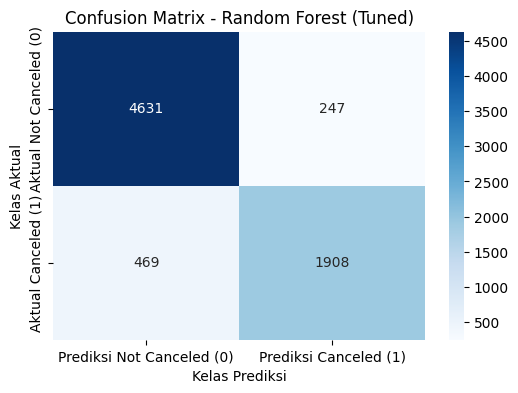

In [70]:
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prediksi Not Canceled (0)', 'Prediksi Canceled (1)'],
            yticklabels=['Aktual Not Canceled (0)', 'Aktual Canceled (1)'])
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.ylabel('Kelas Aktual')
plt.xlabel('Kelas Prediksi')
plt.show()

##### b. XGBoost

In [71]:
print("\nMengevaluasi Model XGBoost (Hasil Tuning) pada data test...")
y_pred_xgb_tuned = xgb_tuned_model.predict(X_test)
y_prob_xgb_tuned = xgb_tuned_model.predict_proba(X_test)[:, 1]



Mengevaluasi Model XGBoost (Hasil Tuning) pada data test...


In [72]:
print("\nLaporan Klasifikasi (XGBoost - Tuned):")
print(classification_report(y_test, y_pred_xgb_tuned, target_names=['Not Canceled (0)', 'Canceled (1)']))
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
roc_auc_xgb_tuned = roc_auc_score(y_test, y_prob_xgb_tuned)
print(f"Akurasi (XGB Tuned): {accuracy_xgb_tuned:.4f}")
print(f"ROC AUC Score (XGB Tuned): {roc_auc_xgb_tuned:.4f}")


Laporan Klasifikasi (XGBoost - Tuned):
                  precision    recall  f1-score   support

Not Canceled (0)       0.91      0.94      0.93      4878
    Canceled (1)       0.87      0.81      0.84      2377

        accuracy                           0.90      7255
       macro avg       0.89      0.88      0.88      7255
    weighted avg       0.90      0.90      0.90      7255

Akurasi (XGB Tuned): 0.8999
ROC AUC Score (XGB Tuned): 0.9583


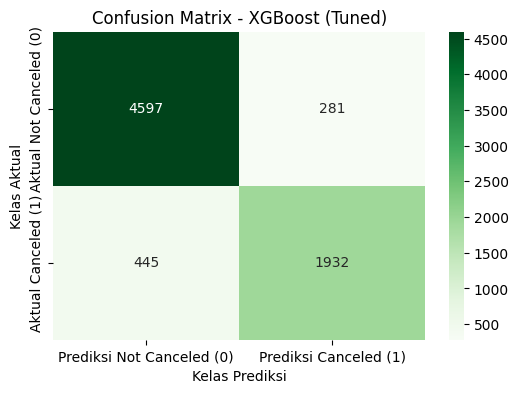

In [73]:
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Prediksi Not Canceled (0)', 'Prediksi Canceled (1)'],
            yticklabels=['Aktual Not Canceled (0)', 'Aktual Canceled (1)'])
plt.title('Confusion Matrix - XGBoost (Tuned)')
plt.ylabel('Kelas Aktual')
plt.xlabel('Kelas Prediksi')
plt.show()

### 2.2.3 Membandingkan Base Model Dengan Tuned Model

In [74]:
# Ambil F1 & Recall Canceled dari base models (Hitung jika belum ada variabelnya)
f1_rf_base_canceled = f1_score(y_test, y_pred_rf, pos_label=1)
f1_xgb_base_canceled = f1_score(y_test, y_pred_xgb, pos_label=1)
recall_rf_base_canceled = recall_score(y_test, y_pred_rf, pos_label=1)
recall_xgb_base_canceled = recall_score(y_test, y_pred_xgb, pos_label=1)
# Ambil F1 & Recall Canceled dari tuned models
f1_rf_tuned_canceled = f1_score(y_test, y_pred_rf_tuned, pos_label=1)
f1_xgb_tuned_canceled = f1_score(y_test, y_pred_xgb_tuned, pos_label=1)
recall_rf_tuned_canceled = recall_score(y_test, y_pred_rf_tuned, pos_label=1)
recall_xgb_tuned_canceled = recall_score(y_test, y_pred_xgb_tuned, pos_label=1)

In [75]:
print("\nPerbandingan Metrik Utama (Base vs Tuned):")
print("--------------------------------------------------------------------------")
print(f"Metrik            | Base RF  | Base XGB | Tuned RF | Tuned XGB")
print("--------------------------------------------------------------------------")
print(f"Akurasi           | {accuracy_rf:.4f}   | {accuracy_xgb:.4f}  | {accuracy_rf_tuned:.4f}   | {accuracy_xgb_tuned:.4f}")
print(f"F1 Score (Cancel) | {f1_rf_base_canceled:.4f}   | {f1_xgb_base_canceled:.4f}  | {f1_rf_tuned_canceled:.4f}   | {f1_xgb_tuned_canceled:.4f}")
print(f"Recall (Cancel)   | {recall_rf_base_canceled:.4f}   | {recall_xgb_base_canceled:.4f}  | {recall_rf_tuned_canceled:.4f}   | {recall_xgb_tuned_canceled:.4f}")
print(f"ROC AUC           | {roc_auc_rf:.4f}   | {roc_auc_xgb:.4f}  | {roc_auc_rf_tuned:.4f}   | {roc_auc_xgb_tuned:.4f}")
print("--------------------------------------------------------------------------")


Perbandingan Metrik Utama (Base vs Tuned):
--------------------------------------------------------------------------
Metrik            | Base RF  | Base XGB | Tuned RF | Tuned XGB
--------------------------------------------------------------------------
Akurasi           | 0.8759   | 0.8937  | 0.9013   | 0.8999
F1 Score (Cancel) | 0.7964   | 0.8321  | 0.8420   | 0.8418
Recall (Cancel)   | 0.7404   | 0.8035  | 0.8027   | 0.8128
ROC AUC           | 0.9346   | 0.9552  | 0.9579   | 0.9583
--------------------------------------------------------------------------


In [76]:
# Hitung FPR, TPR untuk ROC Curve (Semua Model)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf) # Base RF
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb) # Base XGB
fpr_rf_tuned, tpr_rf_tuned, _ = roc_curve(y_test, y_prob_rf_tuned) # Tuned RF
fpr_xgb_tuned, tpr_xgb_tuned, _ = roc_curve(y_test, y_prob_xgb_tuned) # Tuned XGB

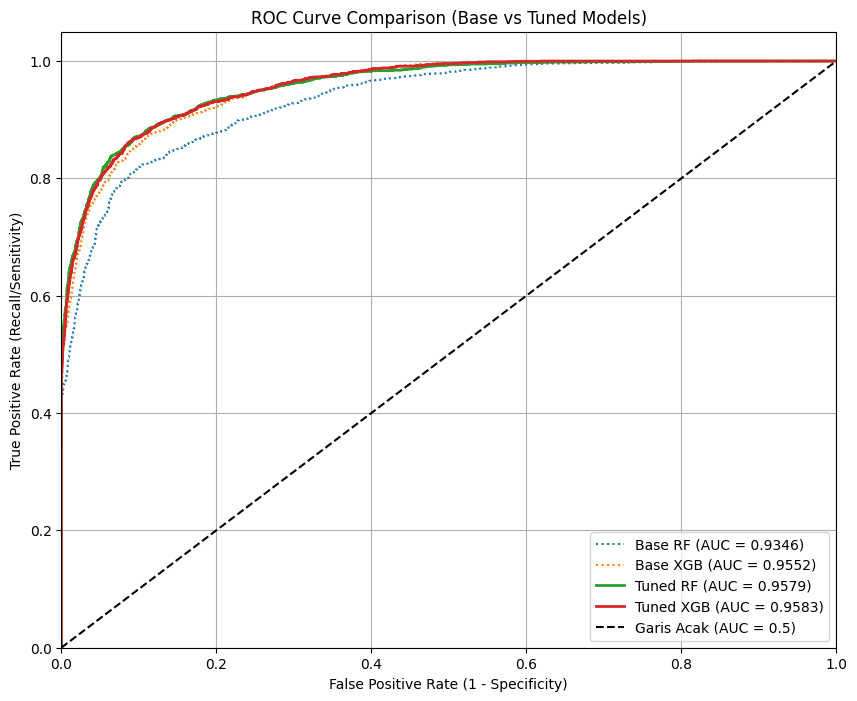

In [77]:
# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Base RF (AUC = {roc_auc_rf:.4f})', linestyle=':')
plt.plot(fpr_xgb, tpr_xgb, label=f'Base XGB (AUC = {roc_auc_xgb:.4f})', linestyle=':')
plt.plot(fpr_rf_tuned, tpr_rf_tuned, label=f'Tuned RF (AUC = {roc_auc_rf_tuned:.4f})', linewidth=2)
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, label=f'Tuned XGB (AUC = {roc_auc_xgb_tuned:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Garis Acak (AUC = 0.5)') # Garis referensi
# Pengaturan Plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall/Sensitivity)')
plt.title('ROC Curve Comparison (Base vs Tuned Models)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### 2.2.4 Pilih Model Terbaik

In [78]:
model_performance = {
    'Base RF': {'model': rf_model, 'roc_auc': roc_auc_rf, 'f1_canceled': f1_rf_base_canceled},
    'Base XGB': {'model': xgb_model, 'roc_auc': roc_auc_xgb, 'f1_canceled': f1_xgb_base_canceled},
    'Tuned RF': {'model': rf_tuned_model, 'roc_auc': roc_auc_rf_tuned, 'f1_canceled': f1_rf_tuned_canceled},
    'Tuned XGB': {'model': xgb_tuned_model, 'roc_auc': roc_auc_xgb_tuned, 'f1_canceled': f1_xgb_tuned_canceled}
}

In [79]:
# Pilih model terbaik berdasarkan ROC AUC pada test set
best_model_name_final = max(model_performance, key=lambda k: model_performance[k]['roc_auc'])
best_model_object_final = model_performance[best_model_name_final]['model']
best_roc_auc = model_performance[best_model_name_final]['roc_auc']

In [80]:
print(f"\nModel terbaik final dipilih: {best_model_name_final} (ROC AUC Test: {best_roc_auc:.4f})")



Model terbaik final dipilih: Tuned XGB (ROC AUC Test: 0.9583)


In [81]:
# Tampilkan parameter terbaik jika model yang dipilih adalah hasil tuning
if 'Tuned' in best_model_name_final:
    if 'RF' in best_model_name_final:
        print("Parameter terbaiknya:", rf_tuner.best_params_)
    elif 'XGB' in best_model_name_final:
        print("Parameter terbaiknya:", xgb_tuner.best_params_)


Parameter terbaiknya: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}


### 2.2.5 Feature Important

In [90]:
if hasattr(best_model_object_final, 'feature_importances_'):
    print(f"\nMenganalisis Feature Importance untuk model: {best_model_name_final}")

    importances = best_model_object_final.feature_importances_

    # Dapatkan nama fitur dari data training 
    try:
        feature_names = X_train.columns
    except NameError:
        try:
             feature_names = features.columns
             print("Menggunakan nama kolom dari DataFrame 'features' (sebelum split).")
        except NameError:
             feature_names = [f"feature_{i}" for i in range(len(importances))]
             print("Warning: Nama fitur asli tidak ditemukan, menggunakan nama generik.")


    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Urutkan fitur berdasarkan importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("\nFeature Importance (Top 20):")
    display(feature_importance_df)


else:
    print(f"\nModel {best_model_name_final} tidak memiliki atribut 'feature_importances_'. Analisis ini tidak dapat dilakukan untuk tipe model ini.")




Menganalisis Feature Importance untuk model: Tuned XGB

Feature Importance (Top 20):


,Feature,Importance
28,market_segment_type_Online,0.156430
13,no_of_special_requests,0.105312
4,required_car_parking_space,0.092701
27,market_segment_type_Offline,0.062487
26,market_segment_type_Corporate,0.059623
6,arrival_year,0.059491
5,lead_time,0.051298
9,repeated_guest,0.040716
16,type_of_meal_plan_Meal Plan 2,0.031736
11,no_of_previous_bookings_not_canceled,0.030755


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9324\695133337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


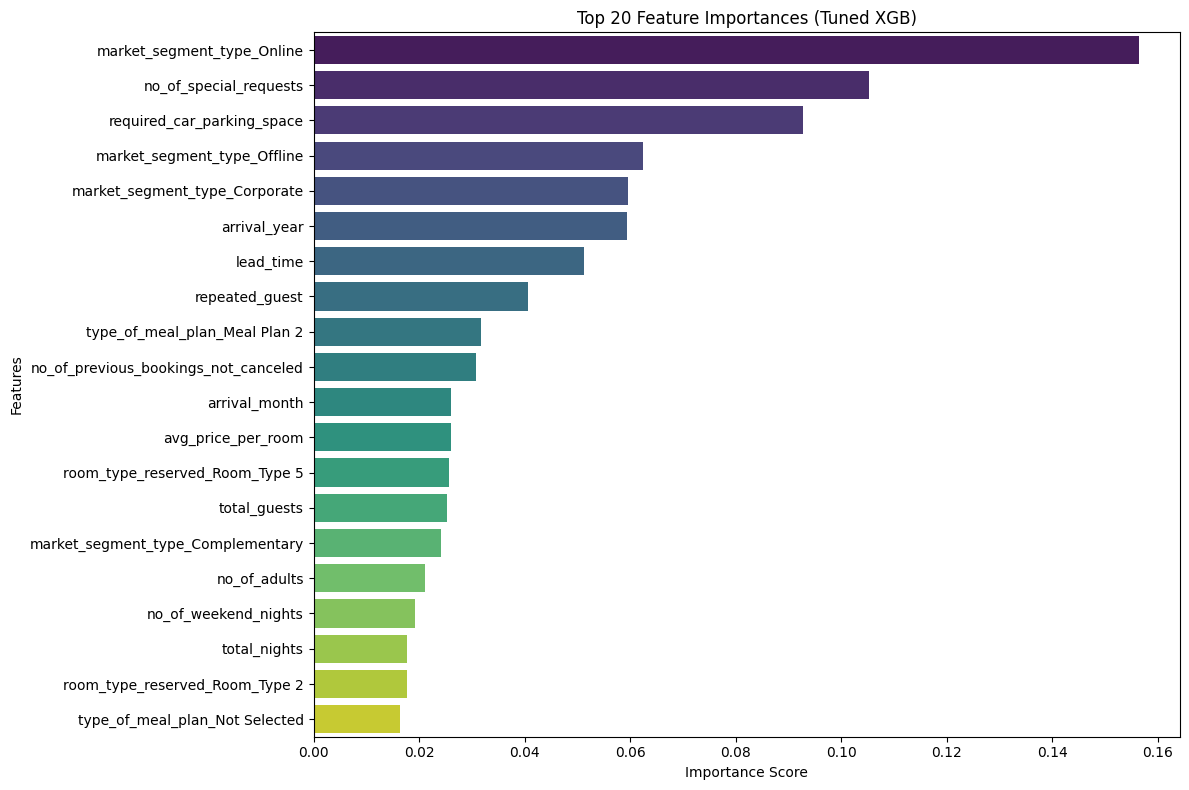

In [ ]:
# --- Visualisasi Feature Importance ---
plt.figure(figsize=(12, 8)) 
top_n = 20 # Jumlah fitur teratas yang ingin ditampilkan
sns.barplot(
  x='Importance',
  y='Feature',
  data=feature_importance_df.head(top_n),
  palette='viridis')
plt.title(f'Top {top_n} Feature Importances ({best_model_name_final})')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout() 
plt.show()

### 2.2.6 Simpan Model Terbaik

In [83]:
model_folder_absolute = r"C:\Users\Lenovo\Documents\RIDHO'S LIFE\Dodoo\KULIAH\Semester 6\Model Deployment\Minggu 7.5 UTS\models"

In [84]:
# Memastikan folder tujuan ada, jika tidak maka buat folder tersebut
if not os.path.exists(model_folder_absolute):
    try:
        os.makedirs(model_folder_absolute)
        print(f"Folder '{model_folder_absolute}' telah dibuat.")
    except OSError as e:
        print(f"Error saat membuat folder '{model_folder_absolute}': {e}")

In [85]:
# Tentukan nama file model
model_filename = os.path.join(model_folder_absolute, 'best_model_final.pkl')

# Simpan model terbaik final ke file pickle
try:
    with open(model_filename, 'wb') as file:
        pickle.dump(best_model_object_final, file)
    print(f"Model terbaik ({best_model_name_final}) berhasil disimpan ke: {model_filename}")
except Exception as e:
    print(f"Error saat menyimpan model ke '{model_filename}': {e}")

Model terbaik (Tuned XGB) berhasil disimpan ke: C:\Users\Lenovo\Documents\RIDHO'S LIFE\Dodoo\KULIAH\Semester 6\Model Deployment\Minggu 7.5 UTS\models\best_model_final.pkl


# Analisis dan Kesimpulan
Berdasarkan perbandingan metrik antara model Base Random Forest, Base XGBoost, Tuned Random Forest, dan Tuned XGBoost untuk tugas klasifikasi pembatalan pemesanan hotel (dengan 'booking_status' sebagai variabel target)
- `Akurasi`: Tuned RF memiliki akurasi tertinggi (0.9013), diikuti oleh Tuned XGB (0.8999), Base XGB (0.8937), dan Base RF (0.8759). Ini menunjukkan bahwa secara keseluruhan, Tuned RF paling banyak memprediksi dengan benar.
- `F1 Score (Cancel)`: Tuned RF kembali unggul (0.8420), sangat tipis diikuti oleh Tuned XGB (0.8418). Base XGB (0.8321) dan Base RF (0.7964) memiliki skor F1 yang lebih rendah untuk kelas "Cancel". F1 Score adalah metrik yang baik untuk kelas yang mungkin tidak seimbang.
- `Recall (Cancel)`: Tuned XGB memiliki recall tertinggi untuk kelas "Cancel" (0.8128), diikuti oleh Tuned RF (0.8027), Base XGB (0.8035), dan Base RF (0.7404). Recall penting jika kita ingin meminimalkan false negative untuk kelas "Cancel" (yaitu, sebisa mungkin mengidentifikasi semua kejadian "Cancel" yang sebenarnya).
- `ROC AUC`: Tuned XGB memiliki ROC AUC tertinggi (0.9583), sangat tipis diikuti oleh Tuned RF (0.9579). Base XGB (0.9552) dan Base RF (0.9346) memiliki nilai ROC AUC yang lebih rendah. ROC AUC mengukur kemampuan model untuk membedakan antara kelas positif dan negatif secara keseluruhan.

*Analisis*
1. Peningkatan Performa Setelah Tuning: Secara umum, terlihat bahwa proses hyperparameter tuning berhasil meningkatkan performa kedua jenis model (Random Forest dan XGBoost). Hal ini ditunjukkan dengan nilai metrik yang lebih tinggi pada versi tuned dibandingkan dengan versi base untuk hampir semua metrik.
2. Perbandingan Antar Model (Base): Model Base XGBoost menunjukkan performa yang lebih baik dibandingkan Base Random Forest di semua metrik utama. Ini mengindikasikan bahwa XGBoost, dengan mekanisme gradient boosting-nya, mampu menangkap pola dalam data pembatalan pemesanan hotel dengan lebih efektif dibandingkan Random Forest dengan konfigurasi default.
3. Perbandingan Antar Model (Tuned): Setelah dilakukan tuning, Tuned Random Forest berhasil melampaui Tuned XGBoost dalam hal Akurasi (0.9013 vs 0.8999) dan F1 Score untuk kelas 'Cancel' (0.8420 vs 0.8418), meskipun perbedaannya sangat tipis. Tuned XGBoost menunjukkan keunggulan yang sangat tipis dalam Recall untuk kelas 'Cancel' (0.8128 vs 0.8027) dan ROC AUC (0.9583 vs 0.9579). ROC AUC yang lebih tinggi mengindikasikan kemampuan pemisahan kelas yang sedikit lebih baik secara keseluruhan.
4. Fokus pada Metrik Target ('Cancel'): Mengingat variabel target adalah 'booking_status' yang kemungkinan memiliki dua kelas (misalnya, 'Canceled' dan 'Not Canceled'), metrik seperti F1 Score dan Recall untuk kelas 'Cancel' menjadi sangat relevan.
    - F1 Score (Cancel): Mengukur keseimbangan antara presisi dan recall untuk prediksi pembatalan. Skor yang lebih tinggi menunjukkan model yang baik dalam mengidentifikasi pembatalan tanpa banyak melakukan kesalahan prediksi positif (memprediksi batal padahal tidak). Tuned Random Forest sedikit lebih unggul di metrik ini.
    - Recall (Cancel): Mengukur kemampuan model untuk mengidentifikasi semua pemesanan yang sebenarnya dibatalkan. Skor yang lebih tinggi berarti model lebih sedikit melewatkan kasus pembatalan. Tuned XGBoost sedikit lebih unggul di metrik ini.
5. ROC AUC sebagai Indikator Umum: ROC AUC memberikan gambaran keseluruhan tentang kemampuan model dalam membedakan antara pemesanan yang dibatalkan dan yang tidak, di berbagai threshold klasifikasi. Nilai ROC AUC yang tinggi pada kedua model tuned (mendekati 0.96) menunjukkan performa yang sangat baik dalam memisahkan kedua kelas tersebut.

*Kesimpulan*

Berdasarkan perbandingan metrik, dapat disimpulkan bahwa model yang telah di-tuning (Tuned Random Forest dan Tuned XGBoost) secara signifikan lebih baik dalam melakukan klasifikasi pembatalan pemesanan hotel dibandingkan dengan model dengan parameter dasar. karena prioritas utama adalah memastikan sebanyak mungkin pemesanan yang dibatalkan terdeteksi (meskipun mungkin dengan sedikit peningkatan false positive), dan kemampuan pemisahan kelas secara keseluruhan, maka **Tuned XGBoost lebih unggul dibandingkan Tuned Random Forest**

